# Assignment 1: N-Gram Language Models



## Setup

In [ ]:
# TODO: Import required libraries
import re
import math

## Dataset

You are given (via eLearning) a corpus of reviews of Chicago hotels Each line in these files corresponds to a single review. Here is an example:  

```
After Leaving some important documents in the room, I called and asked for the lost and
found department... SEVEN TIMES over the course of a week. Eventually I had enough and
asked for a manager and was put on hold then disconnected. Finally , a deceivingly friendly
operator PROMISED me she would have someone call me back in a few minutes, It never
happened. So Avoid this place because after they rip you off once they’ll keep doing it later.
They cannot be trusted at their word.
```
**\*Note for Google Colab you wil have to upload train.txt and val.txt to session storage every time you start a new session\***

In [ ]:
trainFile = "train.txt"
valFile = "val.txt"

with open(trainFile, "r", encoding="utf-8") as f:
    trainCorpus = [line.lower().strip() for line in f]

with open(valFile, "r", encoding="utf-8") as f:
    valCorpus = [line.lower().strip() for line in f]

print("Sample training review:", trainCorpus[0][:2000])

Sample training review: i booked two rooms four months in advance at the talbott . we were placed on the top floor next to the elevators , which are used all night long . when speaking to the front desk , i was told that they were simply honoring my request for an upper floor , which i had requested for a better view . i am looking at a brick wall , and getting no sleep . he also told me that they had received complaints before from guests on the 16th floor , and were aware of the noise problem . why then did they place us on this floor when the hotel is not totally booked ? a request for an upper floor does not constitute placing someone on the top floor and using that request to justify this . if you decide to stay here , request a room on a lower floor and away from the elevator ! i spoke at length when booking my two rooms about my preferences . this is simply poor treatment of a guest whom they believed would not complain .


## Preprocessing Decisions

Preprocessing The files included are already tokenized and hence it should be straightforward to obtain the tokens by using space as the delimiter. Feel free to do any other preprocessing that you might think is important for this corpus. Do not forget to describe and explain your pre-processing choices in your report.

In [ ]:
cleanTrainLines = []

#Clean each train review and split it individually
for line in trainCorpus:
  line = re.sub(r'[^\w\s]', '', line)
  line = line.split(' ')

  while '' in line:
        line.remove('')

  while '\n' in line:
        line.remove('\n')

  line.insert(0, '<s>')
  line.append('</stop>')
  cleanTrainLines.append(line)

print(cleanTrainLines)

#Helper function to sort dictionaries for printing
def sort(dict):
  return sorted(dict.items(), key=lambda x: x[1], reverse=True)

#Helper function to ensure that  the calculated probabilites of the models add up to 1
def validateProbabilties(dict):
  total_prob = sum(list(dict.values()))
  print("\nTotal probability:", total_prob)

[['<s>', 'i', 'booked', 'two', 'rooms', 'four', 'months', 'in', 'advance', 'at', 'the', 'talbott', 'we', 'were', 'placed', 'on', 'the', 'top', 'floor', 'next', 'to', 'the', 'elevators', 'which', 'are', 'used', 'all', 'night', 'long', 'when', 'speaking', 'to', 'the', 'front', 'desk', 'i', 'was', 'told', 'that', 'they', 'were', 'simply', 'honoring', 'my', 'request', 'for', 'an', 'upper', 'floor', 'which', 'i', 'had', 'requested', 'for', 'a', 'better', 'view', 'i', 'am', 'looking', 'at', 'a', 'brick', 'wall', 'and', 'getting', 'no', 'sleep', 'he', 'also', 'told', 'me', 'that', 'they', 'had', 'received', 'complaints', 'before', 'from', 'guests', 'on', 'the', '16th', 'floor', 'and', 'were', 'aware', 'of', 'the', 'noise', 'problem', 'why', 'then', 'did', 'they', 'place', 'us', 'on', 'this', 'floor', 'when', 'the', 'hotel', 'is', 'not', 'totally', 'booked', 'a', 'request', 'for', 'an', 'upper', 'floor', 'does', 'not', 'constitute', 'placing', 'someone', 'on', 'the', 'top', 'floor', 'and', 'us

In [ ]:
cleanTestLines = []

#Clean each test review and split it individually
for line in valCorpus:
  line = re.sub(r'[^\w\s]', '', line)
  line = line.split(' ')

  while '' in line:
        line.remove('')

  while '\n' in line:
        line.remove('\n')

  line.insert(0, '<s>')
  line.append('</stop>')
  cleanTestLines.append(line)

print(cleanTestLines)

[['<s>', 'i', 'stayed', 'for', 'four', 'nights', 'while', 'attending', 'a', 'conference', 'the', 'hotel', 'is', 'in', 'a', 'great', 'spot', 'easy', 'walk', 'to', 'michigan', 'ave', 'shopping', 'or', 'rush', 'st', 'but', 'just', 'off', 'the', 'busy', 'streets', 'the', 'room', 'i', 'had', 'was', 'spacious', 'and', 'very', 'wellappointed', 'the', 'staff', 'was', 'friendly', 'and', 'the', 'fitness', 'center', 'while', 'not', 'huge', 'was', 'wellequipped', 'and', 'clean', 'i', 've', 'stayed', 'at', 'a', 'number', 'of', 'hotels', 'in', 'chicago', 'and', 'this', 'one', 'is', 'my', 'favorite', 'internet', 'was', 'nt', 'free', 'but', 'at', '10', 'for', '24', 'hours', 'is', 'cheaper', 'than', 'most', 'business', 'hotels', 'and', 'it', 'worked', 'very', 'well', '</stop>'], ['<s>', 'we', 'love', 'the', 'location', 'and', 'proximity', 'to', 'everything', 'the', 'staff', 'was', 'very', 'friendly', 'and', 'courteous', 'they', 'were', 'so', 'nice', 'to', 'our', '25', 'year', 'old', 'boy', 'got', 'his'

## Unsmoothed Unigram Model

You must write the code for gathering n-gram counts and computing n-gram probabilities yourself. For example, consider the simple corpus consisting of the sole sentence:  

```
the students like the assignment
```
Part of what your program would compute for a unigram and bigram model, for example, would be the following:  

```
P (the) = 0.4, P (like) = 0.2
P (the|like) = 1.0, P (students|the) = 0.5
```

In [ ]:
#Create word dictionary and count total words for unigram
unigramCount = {}
totalUnigrams = 0

for line in cleanTrainLines:
    for word in line:
        totalUnigrams += 1
        if word not in unigramCount:
            unigramCount[word] = 1
        else:
            unigramCount[word] += 1

print("Top 5 unigram counts: ",sort(unigramCount)[:5])
print("Total unigrams in corpus: ",totalUnigrams)


Top 5 unigram counts:  [('the', 5302), ('and', 2593), ('a', 2247), ('to', 2090), ('was', 1826)]
Total unigrams in corpus:  80423


In [ ]:
#Calculate unigram probabilities on training data
unigramModel = {}
for word, count in unigramCount.items():
    probability = count / totalUnigrams
    unigramModel[word] = probability

print("Top 5 unigram probabilities: ",sort(unigramModel)[:5])

Top 5 unigram probabilities:  [('the', 0.0659264140855228), ('and', 0.03224202031757084), ('a', 0.027939768474192706), ('to', 0.025987590614625168), ('was', 0.022704947589619884)]


## Unsmoothed Bigram Model

In [ ]:
#Create word dictionary and count total words for bigrams
bigramCount = {}
totalBigrams = 0

for line in cleanTrainLines:
    for i in range(len(line) - 1):
        totalBigrams += 1
        if (line[i], line[i + 1]) not in bigramCount:
            bigramCount[(line[i], line[i + 1])] = 1
        else:
            bigramCount[(line[i], line[i + 1])] += 1

print("Top 5 bigram counts: ", sort(bigramCount)[:5])
print("Total bigrams in corpus: ", totalBigrams)

Top 5 bigram counts:  [(('in', 'the'), 420), (('the', 'hotel'), 414), (('of', 'the'), 343), (('at', 'the'), 335), (('the', 'room'), 295)]
Total bigrams in corpus:  79911


In [ ]:
#Calculate bigram probabilities
bigramModel = {}

for word, count in bigramCount.items():
    probability = count / (unigramCount[word[0]])
    bigramModel[word] = probability

print("Top 5 bigram probabilities: ", sort(bigramModel)[:5])

Top 5 bigram probabilities:  [(('honoring', 'my'), 1.0), (('16th', 'floor'), 1.0), (('constitute', 'placing'), 1.0), (('placing', 'someone'), 1.0), (('justify', 'this'), 1.0)]


## Smoothing and Unknown Words

Firstly, you should implement one or more than one methods to handle unknown words. Then You will need to implement two smoothing methods (e.g. Laplace, Add-k smoothing with different k). Teams can choose any method(s) that they want for each. The report should make clear what methods were selected, providing a description for any non-standard approach (e.g., an approach that was not covered in class or in the class)

# Smoothing

In [ ]:
# Implement unigram smoothing method
def unigramSmoothing(ngramCounts, totalNgrams, vocabSize, k):
    smoothedModel = {}
    for ngram, count in ngramCounts.items():
        prob = (count + k) / (totalNgrams + (k * vocabSize))
        smoothedModel[ngram] = prob # Ensure prob is a number
    return smoothedModel

## Unigram

In [ ]:
# Apply Laplace smoothing for unigram model
laplaceSmoothedUnigramModel = unigramSmoothing(unigramCount, totalUnigrams, len(unigramCount), 1)

print("Laplace Smoothed Unigram Model:", sort(laplaceSmoothedUnigramModel)[:5])

Laplace Smoothed Unigram Model: [('the', 0.06122566790588126), ('and', 0.02994896898884707), ('a', 0.025954233726649272), ('to', 0.02414159373773293), ('was', 0.02109358764172074)]


## Bigram

In [ ]:
# Implement bigram smoothing method
def bigramSmoothing(ngramCounts, totalNgrams, vocabSize, k):
    smoothedModel = {}
    for ngram, count in ngramCounts.items():
        prob = (count + k) / (unigramCount[ngram[0]] + (k * vocabSize))
        smoothedModel[ngram] = prob # Ensure prob is a number
    return smoothedModel

In [ ]:
#Include the 0-count n-grams in the bigramCount word dictionary
unigrams = list(unigramModel.keys())
print("Total Unique Bigrams Before: ", len(bigramCount))

for i in range(len(unigrams)):
    for j in range(len(unigrams)):
        pair = (unigrams[i], unigrams[j])
        if pair not in bigramCount:
          bigramCount[pair] = 0

print("Total Unique Bigrams After: ", len(bigramCount))

Total Unique Bigrams Before:  37742
Total Unique Bigrams After:  38328481


In [ ]:
#Apply Laplace smoothing for bigram model
laplaceSmoothedBigramModel = bigramSmoothing(bigramCount, totalBigrams, len(bigramCount), 1)

print("Laplace Smoothed Bigram Model: ", sort(laplaceSmoothedBigramModel)[:5])

Laplace Smoothed Bigram Model:  [(('in', 'the'), 1.098363800579816e-05), (('the', 'hotel'), 1.082595996330443e-05), (('of', 'the'), 8.974804202514683e-06), (('at', 'the'), 8.76615666593424e-06), (('the', 'room'), 7.721648552140028e-06)]


## Perplexity Calculation  

Implement code to compute the perplexity of a “development set.” (“development set” is just another way to refer to the validation set — part of a dataset that is distinct from the training portion.) Compute and report the perplexity of your model (with variations) on it. Under the second definition above, perplexity is a function of the average (per-word) log probability: use this to avoid numerical computation errors.  

If you experimented with more than one type of smoothing and unknown word handling, you should report and compare the perplexity results of experiments among some of them

*** for reference - will remove ltr ***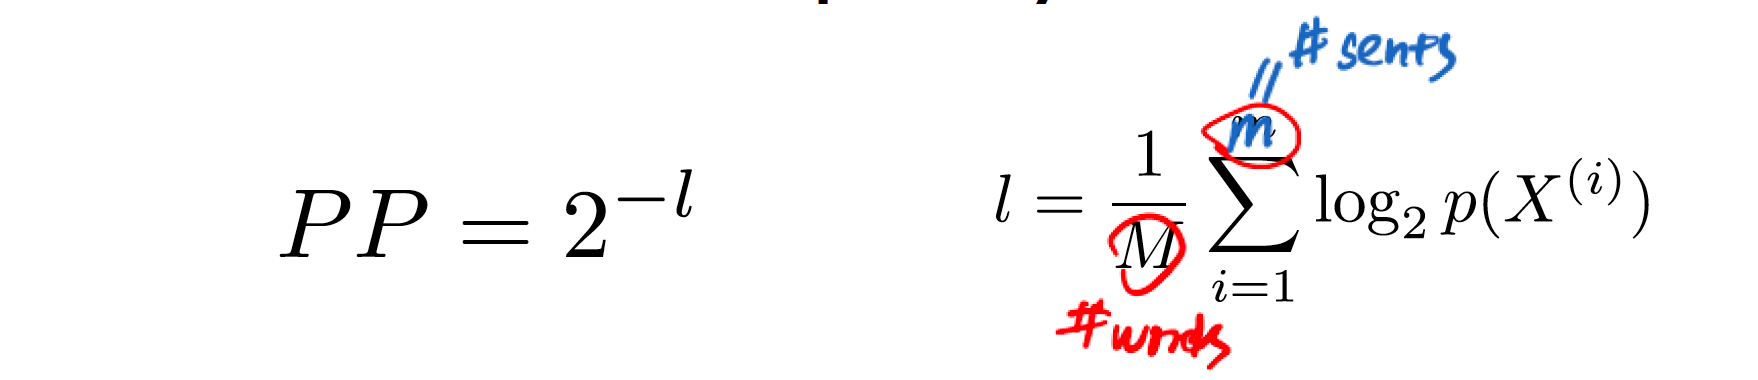

In [ ]:
# TODO: Implement a function to compute perplexity

def unigramPerplexity(valCorpus, unigramModel, totalUnigrams):
  wordCount, log_sum=0,0.0
  vm = len(unigramModel)
  default_prob=1.0/(totalUnigrams + vm)

  for read in valCorpus:
    for currentWord in read:
      if currentWord in (' s<s>', '</stop>'): #skip start and end
          continue
      p = unigramModel.get(currentWord, default_prob) #if word isnt in model -> use default prob
      log_sum += math.log2(p) #calc
      wordCount += 1

  return 2 ** (-log_sum/wordCount)

print("Unigram Perplexity unsmoothed (test): ", unigramPerplexity(cleanTestLines, unigramModel, totalUnigrams))
print("Unigram Perplexity Laplace (test): ", unigramPerplexity(cleanTestLines, laplaceSmoothedUnigramModel, totalUnigrams))


Unigram Perplexity unsmoothed (test):  537.4273940564942
Unigram Perplexity Laplace (test):  551.7871554978694
